<a href="https://colab.research.google.com/github/minhajiumoora/Data_Visualization_Projects/blob/main/HealthCare_DataScience_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##Healthcare Data Science Project


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import xgboost as xgb

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import recall_score, make_scorer
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [2]:
df1 = pd.read_csv("/content/Covid_Dataset.csv")
df1.head()


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03-05-2020,3,1,65,2,0,...,0,0,1,0,0,0,0,0,3,0
1,2,1,2,1,03-06-2020,3,1,72,3,0,...,0,0,1,0,0,1,1,0,5,0
2,2,1,2,2,09-06-2020,1,2,55,3,1,...,0,0,0,0,0,0,0,0,3,1
3,2,1,1,1,12-06-2020,3,2,53,2,0,...,0,0,0,0,0,0,0,0,7,0
4,2,1,2,1,21-06-2020,3,2,68,3,1,...,0,0,1,0,0,0,0,0,3,0


In [3]:
df1.shape


(98923, 21)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98923 entries, 0 to 98922
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   USMER                 98923 non-null  int64 
 1   MEDICAL_UNIT          98923 non-null  int64 
 2   SEX                   98923 non-null  int64 
 3   PATIENT_TYPE          98923 non-null  int64 
 4   DATE_DIED             98923 non-null  object
 5   INTUBED               98923 non-null  int64 
 6   PNEUMONIA             98923 non-null  int64 
 7   AGE                   98923 non-null  int64 
 8   PREGNANT              98923 non-null  int64 
 9   DIABETES              98923 non-null  int64 
 10  COPD                  98923 non-null  int64 
 11  ASTHMA                98923 non-null  int64 
 12  INMSUPR               98923 non-null  int64 
 13  HIPERTENSION          98923 non-null  int64 
 14  OTHER_DISEASE         98923 non-null  int64 
 15  CARDIOVASCULAR        98923 non-null

In [5]:
df1.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,98923.000000,98923.000000,98923.000000,98923.000000,98923.000000,98923.000000,98923.000000,98923.000000,98923.000000,98923.000000,98923.00000,98923.000000,98923.000000,98923.000000,98923.000000,98923.000000,98923.000000,98923.000000,98923.000000,98923.000000
mean,1.512944,3.798166,1.553188,1.525136,2.327942,2.407853,50.700262,2.549630,0.229562,0.031964,0.02877,0.026040,0.287092,0.058824,0.036331,0.189349,0.049463,0.078971,3.830383,0.525136
std,0.499835,0.416742,0.497166,0.499370,0.756339,8.506621,17.510904,0.507152,0.420554,0.175906,0.16716,0.159256,0.452407,0.235295,0.187114,0.391788,0.216833,0.269694,1.583752,0.499370
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,4.000000,1.000000,1.000000,2.000000,1.000000,37.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,50.000000,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
75%,2.000000,4.000000,2.000000,2.000000,3.000000,2.000000,64.000000,3.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
max,2.000000,4.000000,2.000000,2.000000,4.000000,99.000000,107.000000,4.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000


In [6]:
df1.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [7]:
df1.duplicated().any()

True

In [8]:
df1.duplicated().sum()

40492

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98923 entries, 0 to 98922
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   USMER                 98923 non-null  int64 
 1   MEDICAL_UNIT          98923 non-null  int64 
 2   SEX                   98923 non-null  int64 
 3   PATIENT_TYPE          98923 non-null  int64 
 4   DATE_DIED             98923 non-null  object
 5   INTUBED               98923 non-null  int64 
 6   PNEUMONIA             98923 non-null  int64 
 7   AGE                   98923 non-null  int64 
 8   PREGNANT              98923 non-null  int64 
 9   DIABETES              98923 non-null  int64 
 10  COPD                  98923 non-null  int64 
 11  ASTHMA                98923 non-null  int64 
 12  INMSUPR               98923 non-null  int64 
 13  HIPERTENSION          98923 non-null  int64 
 14  OTHER_DISEASE         98923 non-null  int64 
 15  CARDIOVASCULAR        98923 non-null

In [10]:
get_valid_dates = df1['DATE_DIED'] != '9999-99-99'
df1['has_died'] = get_valid_dates.astype(int)
df1.drop(columns=['DATE_DIED'], inplace=True)
df1.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,has_died
0,2,1,1,1,3,1,65,2,0,0,...,0,1,0,0,0,0,0,3,0,1
1,2,1,2,1,3,1,72,3,0,0,...,0,1,0,0,1,1,0,5,0,1
2,2,1,2,2,1,2,55,3,1,0,...,0,0,0,0,0,0,0,3,1,1
3,2,1,1,1,3,2,53,2,0,0,...,0,0,0,0,0,0,0,7,0,1
4,2,1,2,1,3,2,68,3,1,0,...,0,1,0,0,0,0,0,3,0,1


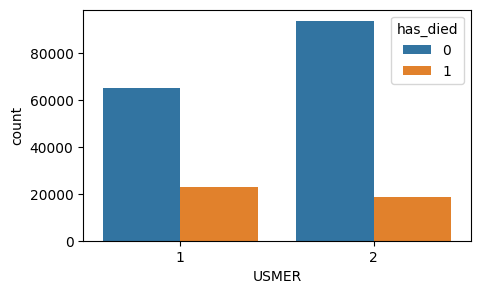

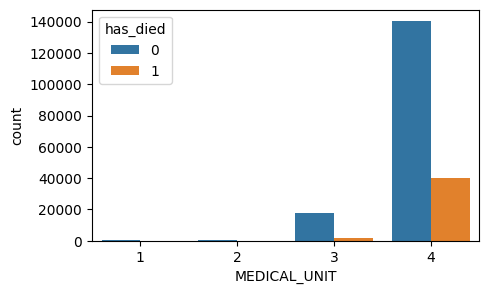

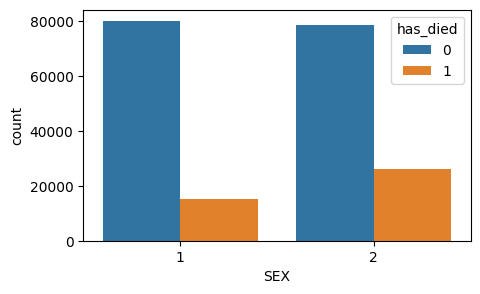

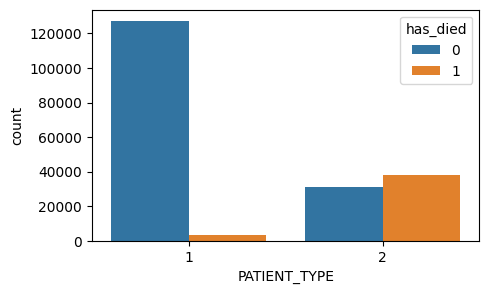

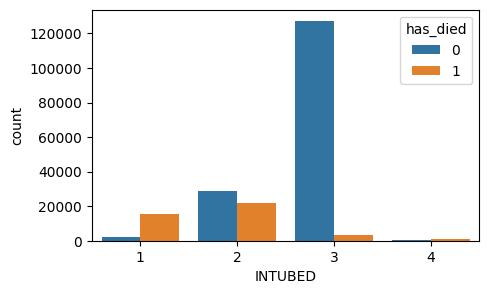

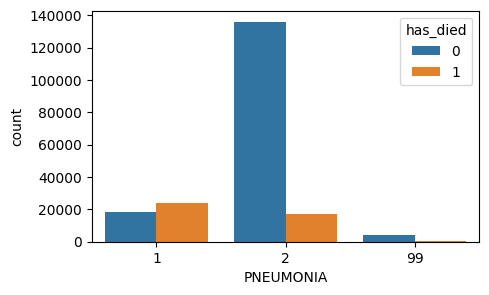

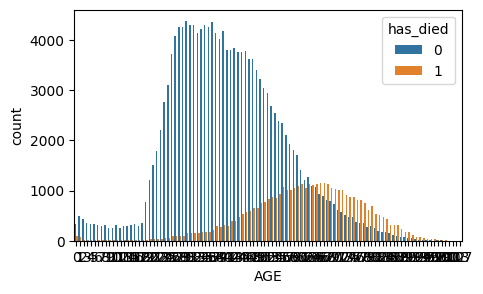

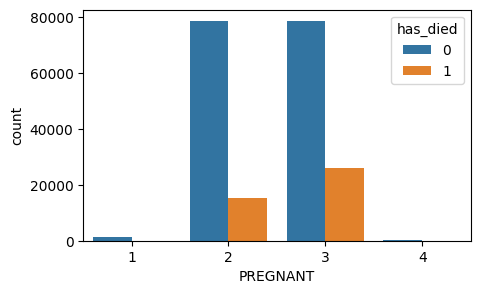

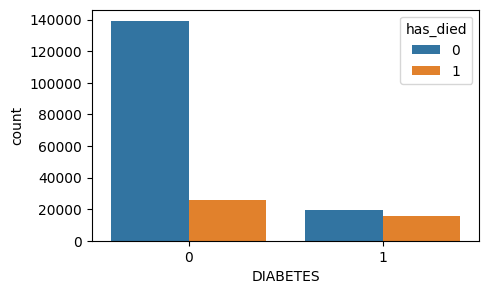

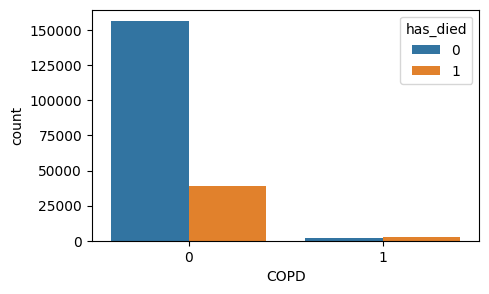

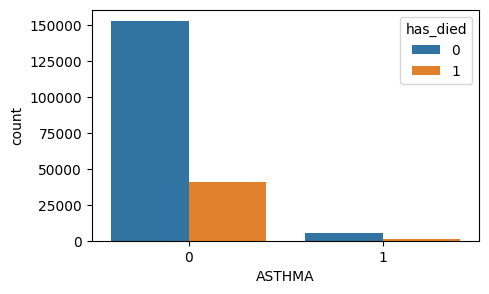

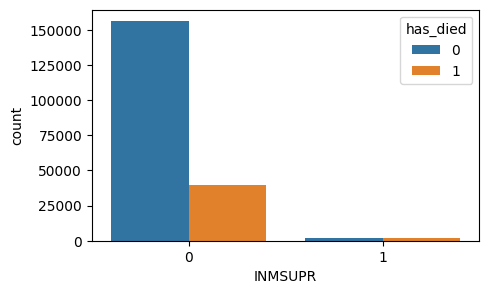

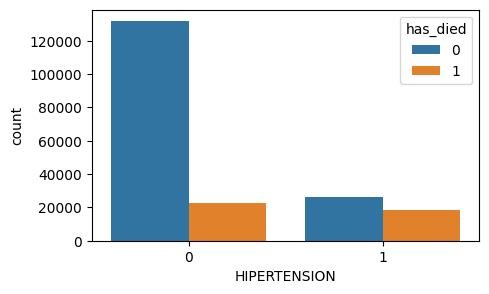

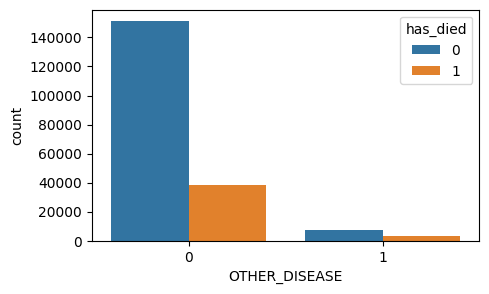

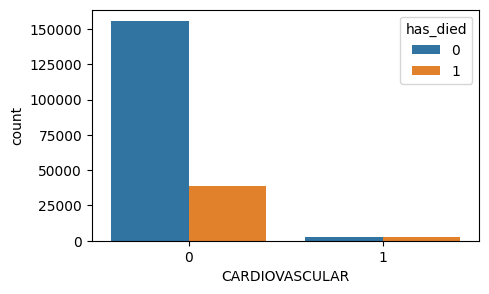

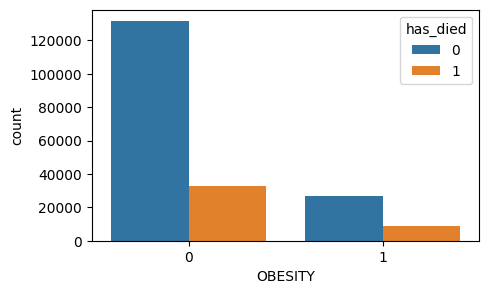

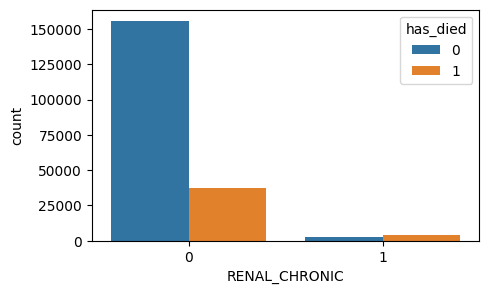

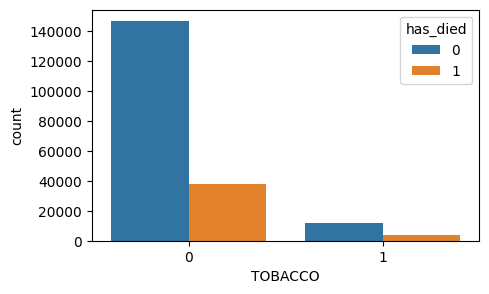

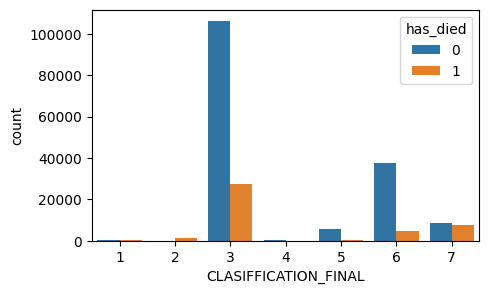

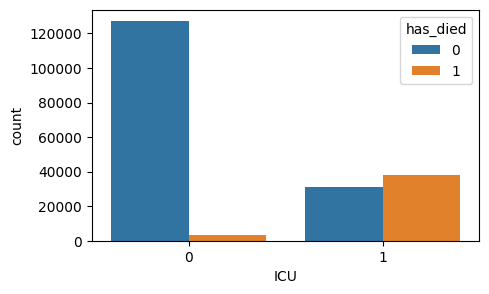

In [21]:
import matplotlib.pyplot as plt
for column in df1.columns:
    if column != 'has_died':
      bar_data = df1.groupby([column, 'has_died']).size().reset_index(name='count')
      plt.figure(figsize=(5, 3))
      sns.barplot(x= column, y='count', hue='has_died', data=bar_data)
      plt.show()


In [22]:
X = df1.drop(columns=['has_died'])
y = df1['has_died']

encoder = pd.get_dummies(X, drop_first=True)
encoder.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,3,1,65,2,0,0,0,0,1,0,0,0,0,0,3,0
1,2,1,2,1,3,1,72,3,0,0,0,0,1,0,0,1,1,0,5,0
2,2,1,2,2,1,2,55,3,1,0,0,0,0,0,0,0,0,0,3,1
3,2,1,1,1,3,2,53,2,0,0,0,0,0,0,0,0,0,0,7,0
4,2,1,2,1,3,2,68,3,1,0,0,0,1,0,0,0,0,0,3,0


In [23]:
from sklearn.feature_selection import SelectKBest, chi2
fs = SelectKBest(chi2, k=10)
X_new = fs.fit_transform(encoder, y)
cols = fs.get_feature_names_out()
fs_df1 = pd.DataFrame(X_new, columns=cols)
fs_df1.shape

(199999, 10)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numerical_features = df1[[col for col in df1.columns if col != 'has_died']]

In [27]:
from sklearn.linear_model import LogisticRegression
classifier_r = LogisticRegression(max_iter=1000)
classifier_r.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred = classifier_r.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Classification Report:\n", classification_rep)
classifier_r.score(X_train, y_train)

[[29906  1860]
 [ 2399  5835]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93     31766
           1       0.76      0.71      0.73      8234

    accuracy                           0.89     40000
   macro avg       0.84      0.83      0.83     40000
weighted avg       0.89      0.89      0.89     40000



0.8929055806598791

In [29]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Classification Report:\n", classification_rep)
classifier.score(X_train, y_train)

[[30146  1620]
 [ 2319  5915]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94     31766
           1       0.79      0.72      0.75      8234

    accuracy                           0.90     40000
   macro avg       0.86      0.83      0.84     40000
weighted avg       0.90      0.90      0.90     40000



0.9503809398808742

In [12]:
import joblib
from sklearn.preprocessing import OrdinalEncoder

new_feature_df = df1[['USMER', 'SEX', 'PATIENT_TYPE', 'CLASIFFICATION_FINAL',
                             'INTUBED', 'PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'CARDIOVASCULAR',
                             'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'ICU', 'AGE']]

oencoder = OrdinalEncoder()
encoded_df = pd.DataFrame(oencoder.fit_transform(new_feature_df))
encoded_df.columns = new_feature_df.columns

# Save the ordinal encoder object for inference pipeline
joblib.dump(oencoder, 'ordinal_encoder.joblib')

['ordinal_encoder.joblib']